# Polynomials

## Definition

Polynomials
$$p(x)=a_nx^n+\cdot+a_1x+a_0$$
are stored in MATLAB as the array of coefficients:
$$p=[a_n\ \dots\ a_1\ a_0]$$
eg., $p(x)=x^2-3x+2$

In [ ]:
p = [1 -3 2];

## Evaluation

The command `polyval` allows us to evaluate the polynomial in a point:

In [ ]:
polyval(p, -2)
polyval(p, -1)
polyval(p, 0)
polyval(p, 1)
polyval(p, 2)

## Roots

The command `roots` gives the roots of a polynomial:

In [ ]:
roots(p)

## Plotting

In [ ]:
%plot --format svg
x = 0:0.01:3;
y = polyval(p, x);
plot(x,y);
grid on;

## Interpolation

Interpolation is finding a curve going through a set of data points `x` and `y`. The command `interp1` does interpolating in MATLAB

In [ ]:
help interp1

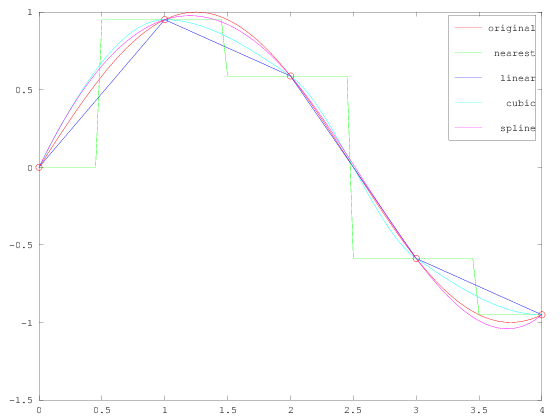

In [1]:
xf = [0:0.05:4];
yf = sin(2*pi*xf/5);
xp = [0:4];
yp = sin(2*pi*xp/5);
lin = interp1(xp, yp, xf);
near = interp1(xp, yp, xf, 'nearest');
pch = interp1(xp, yp, xf, 'pchip');
spl = interp1(xp, yp, xf, 'spline');
plot(xf,yf,'r', xf,near,'g', xf,lin,'b', xf,pch,'c', xf,spl,'m', xp,yp,'ro');
legend('original', 'nearest', 'linear', 'cubic', 'spline');

## Regression

Regression is finding the curve of 'best fit' for a set a data points `x` and `y`. MATLAB fits a polynomial of degree $n$ using `polyfit(x, y, n)`:

In [ ]:
p1 = polyfit(xp, yp, 1); yp1 = polyval(p1, xf); 
p2 = polyfit(xp, yp, 2); yp2 = polyval(p2, xf);
p3 = polyfit(xp, yp, 3); yp3 = polyval(p3, xf); 
p4 = polyfit(xp, yp, 4); yp4 = polyval(p4, xf);
plot(xf,yf,'r', xf,yp1,'g', xf,yp2,'b', xf,yp3,'c', xf,yp4,'m', xp,yp,'ro');
legend('original', 'first order', 'second order', 'third order', 'fourth order');

## Polynomial multiplication

Polynomials can be multiplicated by the operator `conv`, eg.
$$(x^2-1)(x^2+1)=x^4-1$$

In [ ]:
p1=[1 0 -1];
p2=[1 0 1];
conv(p1, p2)

## Partial fractions

The command `residue` gives the partial fraction expansion of a polynomial division, eg.

$$\frac{7x-5}{x^2-x-2}$$

In [ ]:
p1 = [7 -5];
p2 = [1 -1 -2];
[r,p,k] = residue(p1, p2)

$$\frac{7x-5}{x^2-x-2}=\frac{3}{x-2}+\frac{4}{x+1}$$

$$\frac{3x^3+2x^2+x+1}{x-1}$$

In [ ]:
[r,p,k] = residue([3,2,1,1],[1,-1])

$$\frac{3x^3+2x^2+x+1}{x-1}=3x^2+5x+6+\frac{7}{x-1}$$

# Complex numbers

## Definition

If $a$ and $b$ are real numbers and $i$ is defined by $i^2 = -1$, then
$$z=a+bi$$
is called a complex number:

In [ ]:
a = 2;
b = -1;
z = a+b*i

## Representations

### Cartesian form

The real part and the imaginary part of a complex number can be found by the following commands:

In [ ]:
real(z)
imag(z)

### Polar form

The modulus $r$ and the argument $\theta$ are given by:

In [2]:
r = norm(z) % or abs(z)
theta = angle(z) % expressed in radians

error: 'z' undefined near line 1 column 10
error: evaluating argument list element number 1
error: 'z' undefined near line 1 column 15
error: evaluating argument list element number 1


The exponential notation
$$z = r(\cos\theta+i\sin\theta) = re^{i\theta}$$
gives the same complex number:

In [ ]:
r*(cos(theta)+i*sin(theta))
r*exp(i*theta)

## Operators

All the operators defined for real numbers can be used for complex numbers. The complex conjugate of $z=a+bi$, $$\bar z=a-bi$$
is calculated by the command `conj`:

In [ ]:
z1 = 2+3*i;
z2 = 5-2*i;
z1/z2
z1*conj(z2)/abs(z2)^2
z1*z2
abs(z1)*abs(z2)*exp(i*(angle(z1)+angle(z2)))

## Functions

All function defined for real number can also be used for complex numbers, eg:
$$\sin z = \frac{e^{zi}-e^{-zi}}{2i}$$
$$\cos z = \frac{e^{zi}+e^{-zi}}{2}$$

In [ ]:
sin(z1)
0.5*(exp(z1*i)-exp(-z1*i))/i
cos(z2)
0.5*(exp(z2*i)+exp(-z2*i))

## Root finding

Find all cubic roots of $-1$:

In [ ]:
z = -1; r = norm(z); theta = angle(z);
cubic_root(1) = r^(1/3)*exp(i*theta/3);
cubic_root(2) = r^(1/3)*exp(i*(theta+2*pi)/3);
cubic_root(3) = r^(1/3)*exp(i*(theta+4*pi)/3);
plot(cubic_root, 'ro'); axis square; grid on;
hold on; t = 0:2*pi/100:2*pi; plot(exp(i*t));

# Fundamental theorem of algebra

The fundamental theorem of algebra states that every non-constant single-variable polynomial with complex coefficients has at least one complex root. This includes polynomials with real coefficients, since every real number is a complex number with an imaginary part equal to zero.

Equivalently (by definition), the theorem states that the field of complex numbers is algebraically closed.

The theorem is also stated as follows: every non-zero, single-variable, degree n polynomial with complex coefficients has, counted with multiplicity, exactly n complex roots. The equivalence of the two statements can be proven through the use of successive polynomial division.

Evaluate the solutions of $z^3-3z^2+4z-2=0$

In [ ]:
p = [1 -3 4 -2];
z1 = 1; % is a solution
[r,p,k] = residue(p, [1 -z1])

$$z^3-3z^2+4z-2=0+1(z^2-2z+2)(z-1)$$

In [ ]:
D = (-2)^2-4*2;
z2 = 0.5*(2+sqrt(D))/1
z3 = 0.5*(2-sqrt(D))/1

$$z^3-3z^2+4z-2=(z-(1+i))(z-(1-i))(z-1)$$

In [ ]:
p1=[1 -1];
p2=[1 -(1+i)];
p3=[1 -(1-i)];
conv(conv(p2,p3),p1)